In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/9n/0sr5b2sn26z6qnbv7h2_9b9w0000gn/T/ipykernel_32563/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 데이터 전처리 및 Exploratory Data Analysis (EDA)

In [3]:
data = pd.read_excel("./AI_ART_data.xlsx")
# Data cleaning
for col in ["price_USD", "num_item_review"]:
    data[col] = pd.to_numeric(data[col].str.replace(",", ""), errors="coerce")
data["num_item_review"] = data["num_item_review"].fillna(0).astype(int)
data.head()

,image_name,price_USD,star_seller,hue,saturation,value,artwork_sentiment,object_complexity,color_complexity,artwork_quality,...,adult_content_score,aesthetic_score,printable,customizable,main_object,categorized_main_object,theme_of_artwork,materials_of_artwork,stars,num_item_review
0,1.png,28.99,1,warm,37.6771,44.4522,-0.120000,0.178725,7.555649,24.887681,...,0.000116,6.1964,0,1,dog,animal,portrait painting,oil painting,4.9482,2418
1,3.png,14.95,1,cool,33.9589,40.6787,-0.080000,0.636024,7.588228,22.624991,...,0.000171,6.7197,1,0,demon,imaginary character,concept art,digital painting,5.0000,74
2,4.png,88.54,1,cool,31.9000,34.3151,0.000000,0.739586,6.673375,14.836169,...,0.000384,6.4601,0,1,monster,imaginary character,concept art,digital painting,4.9400,15
3,5.png,88.54,1,warm,25.7549,52.9358,-0.340000,0.775734,6.243066,13.462426,...,0.000122,6.1475,0,1,orc,imaginary character,concept art,digital painting,4.9400,15
4,6.png,88.54,1,warm,46.0011,25.6071,-0.113333,0.881556,7.255502,17.397088,...,0.000133,7.3184,0,1,man,human,portrait painting,digital painting,4.9400,15


In [4]:
data["categorized_main_object"].value_counts()

categorized_main_object
human                  534
realistic scenery      333
animal                 299
thing                  152
imaginary character     82
imaginary scenery       41
none                    37
food                    10
insect                   4
plant                    4
기타                       3
Name: count, dtype: int64

In [5]:
data["theme_of_artwork"].value_counts()

theme_of_artwork
illustration          524
graphic design        295
landscape painting    265
portrait painting     199
abstract               74
comics                 73
concept art            44
oriental painting      14
hyperrealism           11
Name: count, dtype: int64

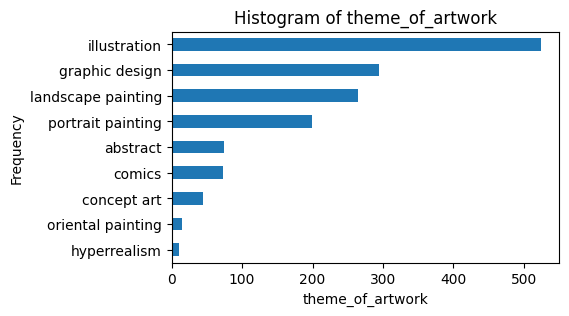

In [6]:
# Categorical Attribute 분포 확인
# column을 바꿔가면서 확인 가능
categorical_column = (
    # "star_seller"
    # "hue"
    # "categorized_main_object"
    "theme_of_artwork"
    # "materials_of_artwork"
    # "printable"
    # "customizable"
)

value_counts = data[categorical_column].value_counts().sort_values(ascending=True)

plt.figure(figsize=(5, 3))
value_counts.plot(kind="barh")  # for horizontal bar chart
# value_counts.plot(kind="bar")  # for vertical bar chart
plt.title(f"Histogram of {categorical_column}")
plt.xlabel(categorical_column)
plt.ylabel("Frequency")
plt.xticks(rotation=0)
# plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees (for vertical bar chart)
plt.show()

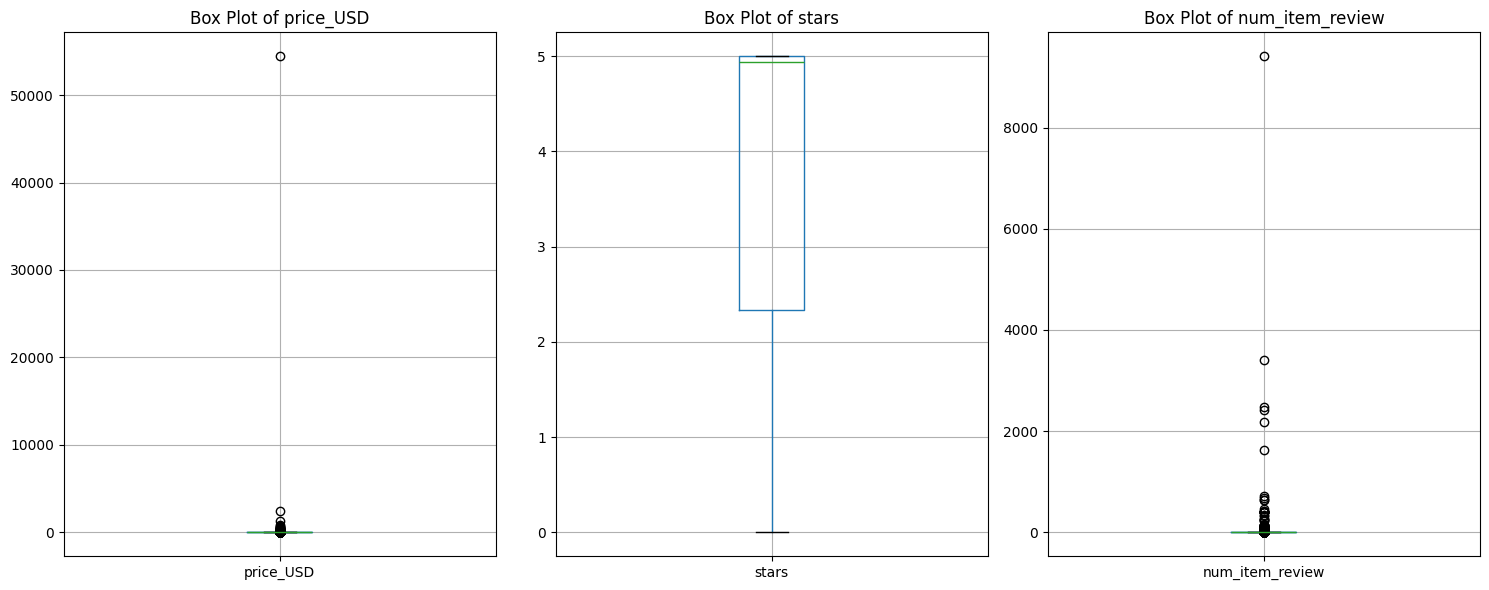

In [7]:
# numerical attribute 분포 확인
# column을 바꿔가면서 확인 가능 - 동시에 여러 column 확인 가능
numerical_columns = [
    "price_USD",
    # "saturation",
    # "value",
    # "artwork_sentiment",
    # "object_complexity",
    # "color_complexity",
    # "artwork_quality",
    # "image_text_similarity",
    # "adult_content_score",
    # "aesthetic_score",
    "stars",
    "num_item_review",
]
num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 6))

for ax, column in zip(axes, numerical_columns):
    data.boxplot(column=column, ax=ax)
    ax.set_title(f"Box Plot of {column}")

plt.tight_layout()
plt.show()

In [8]:
# Numerical Attribute 데이터 요약
data.describe()

,price_USD,star_seller,saturation,value,artwork_sentiment,object_complexity,color_complexity,artwork_quality,image_text_similarity,adult_content_score,aesthetic_score,printable,customizable,stars,num_item_review
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,59.826491,0.149433,38.189395,53.159095,0.003480,0.293363,6.997211,26.860063,0.074281,0.017942,6.344348,0.546364,0.228152,3.659193,24.235490
std,1408.652329,0.356634,15.325173,10.090405,0.123822,0.383794,1.044002,18.649407,0.125223,0.122709,0.501147,0.498012,0.419781,2.116399,286.820834
min,0.110000,0.000000,0.000000,21.153300,-0.390000,0.000000,2.230305,-14.186621,0.002328,0.000105,3.386600,0.000000,0.000000,0.000000,0.000000
25%,3.730000,0.000000,27.357000,46.257300,-0.080000,0.000000,6.497416,13.523585,0.006592,0.000136,6.070500,0.000000,0.000000,2.333300,0.000000
50%,6.570000,0.000000,37.540200,52.837100,0.000000,0.032504,7.168848,24.477820,0.014143,0.000162,6.381600,1.000000,0.000000,4.939400,0.000000
75%,15.070000,0.000000,48.764850,59.821200,0.070000,0.645989,7.676955,37.954992,0.087822,0.000229,6.676850,1.000000,0.000000,5.000000,0.000000
max,54450.000000,1.000000,83.970900,91.182200,0.433333,1.885770,9.238472,155.845000,0.935296,0.999895,7.641500,1.000000,1.000000,5.000000,9411.000000


# 모델 평가

In [9]:
import model_comparison as mc

In [10]:
_data = mc.preprocess_data()

F1, f1_features = mc.prepare_data(_data, feature_type="F1")
F2, f2_features = mc.prepare_data(_data, feature_type="F2")

DV1, DV2 = _data["stars"].values, _data["num_item_review"].values

print("Features in F1:", f1_features)
print("Features in F2:", f2_features)
print("Shape of F1:", F1.shape)
print("Shape of F2:", F2.shape)
print("Features added in F2:", set(f2_features) - set(f1_features))

Features in F1: ['saturation', 'value', 'color_complexity', 'artwork_quality', 'object_complexity', 'price_USD', 'star_seller', 'printable', 'customizable', 'hue_cool', 'hue_warm', 'categorized_main_object_animal', 'categorized_main_object_food', 'categorized_main_object_human', 'categorized_main_object_imaginary character', 'categorized_main_object_imaginary scenery', 'categorized_main_object_insect', 'categorized_main_object_none', 'categorized_main_object_plant', 'categorized_main_object_realistic scenery', 'categorized_main_object_thing', 'categorized_main_object_기타', 'theme_of_artwork_abstract', 'theme_of_artwork_comics', 'theme_of_artwork_concept art', 'theme_of_artwork_graphic design', 'theme_of_artwork_hyperrealism', 'theme_of_artwork_illustration', 'theme_of_artwork_landscape painting', 'theme_of_artwork_oriental painting', 'theme_of_artwork_portrait painting', 'materials_of_artwork_acrylic painting', 'materials_of_artwork_color pencil painting', 'materials_of_artwork_digital 

In [108]:
DV1 = DV1[F1["price_USD"] < 1000]
F1 = F1[F1["price_USD"] < 1000]
F2 = F2[F2["price_USD"] < 1000]
F1

,saturation,value,color_complexity,artwork_quality,object_complexity,price_USD,star_seller,printable,customizable,hue_cool,...,theme_of_artwork_oriental painting,theme_of_artwork_portrait painting,materials_of_artwork_acrylic painting,materials_of_artwork_color pencil painting,materials_of_artwork_digital painting,materials_of_artwork_graphic design,materials_of_artwork_ink drawing,materials_of_artwork_oil painting,materials_of_artwork_pastel painting,materials_of_artwork_watercolor painting
0,37.6771,44.4522,7.555649,24.887681,0.178725,28.99,1,0,1,False,...,False,True,False,False,False,False,False,True,False,False
1,33.9589,40.6787,7.588228,22.624991,0.636024,14.95,1,1,0,True,...,False,False,False,False,True,False,False,False,False,False
2,31.9000,34.3151,6.673375,14.836169,0.739586,88.54,1,0,1,True,...,False,False,False,False,True,False,False,False,False,False
3,25.7549,52.9358,6.243066,13.462426,0.775734,88.54,1,0,1,False,...,False,False,False,False,True,False,False,False,False,False
4,46.0011,25.6071,7.255502,17.397088,0.881556,88.54,1,0,1,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,27.6769,53.1649,7.623983,23.968058,0.000000,7.14,0,0,0,True,...,False,False,False,False,True,False,False,False,False,False
1495,30.8242,69.9376,5.878760,14.906303,0.000000,8.80,0,0,0,False,...,False,False,False,False,False,False,False,True,False,False
1496,52.4127,56.2504,7.420564,1.841371,0.000000,7.70,0,0,0,True,...,False,False,False,False,False,False,False,True,False,False
1497,36.9331,57.5344,6.392299,17.389019,0.002016,5.49,0,0,0,True,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


model = xgb.XGBRegressor()
X = F1.values
y = DV1


# 5-Fold Cross Validation 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 결과를 저장할 리스트
mse_list = []
mae_list = []

# KFold를 통한 교차 검증
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # XGBoost DMatrix로 변환
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # 하이퍼파라미터 설정
    param = {
        "objective": "reg:squarederror",  # 회귀 문제를 위한 손실 함수
        "booster": "gbtree",  # 트리 기반 모델 사용
        "max_depth": 6,  # 트리의 최대 깊이
        "subsample": 0.8,  # 각 트리마다 사용할 데이터의 비율
        "colsample_bynode": 0.8,  # 각 노드에서 사용할 특징의 비율
        "learning_rate": 1,
        "num_parallel_tree": 100,  # 각 반복에서 생성할 트리의 수 (Random Forest 효과)
        "seed": 42,  # 랜덤 시드
        "scale_pos_weight": 2,
    }

    # XGBoost 모델 학습
    num_round = 10  # 부스팅 반복 횟수
    model = xgb.train(param, dtrain, num_round)

    # 예측 수행
    y_pred = model.predict(dtest)

    # MSE 계산
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse_list.append(mse)
    mae_list.append(mae)

# 교차 검증 결과 출력
mean_mse = np.mean(mse_list)
std_mse = np.std(mse_list)

print(f"Cross-validated MSE scores: {mse_list}")
print(f"Mean MSE: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")

mean_mae = np.mean(mae_list)
std_mae = np.std(mae_list)

print(f"Cross-validated MAE scores: {mae_list}")
print(f"Mean MAE: {mean_mae}")
print(f"Standard Deviation of MAE: {std_mae}")

In [ ]:
scorings = ["MAE", "MSE", "R2"]
results = {}
for scoring in scorings:
    results[scoring] = {
        "F1_DV1": mc.compare_models(F1, DV1, scoring=scoring),
        "F1_DV2": mc.compare_models(F1, DV2, scoring=scoring),
        "F2_DV1": mc.compare_models(F2, DV1, scoring=scoring),
        "F2_DV2": mc.compare_models(F2, DV2, scoring=scoring),
    }

## 데이터셋과 종속 변수의 조합 별 결과 확인

In [ ]:
df_results = pd.DataFrame.from_dict(
    {(i, j): results[i][j] for i in results.keys() for j in results[i].keys()},
    orient="index",
)
df_results = df_results[["SVR", "FastforwardNN", "RandomForest", "KNN", "Lasso"]]
df_results = df_results.T
df_results

In [ ]:
df_results["MAE"]

### 조합 별 모델에 따른 결과(Mean Absolute Error, MAE) 시각화 

In [ ]:
scoring = "MAE"
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
df_results[scoring]["F1_DV1"].plot(kind="barh", title="F1 DV1")
plt.subplot(2, 2, 2)
df_results[scoring]["F1_DV2"].plot(kind="barh", title="F1 DV2")
plt.subplot(2, 2, 3)
df_results[scoring]["F2_DV1"].plot(kind="barh", title="F2 DV1")
plt.subplot(2, 2, 4)
df_results[scoring]["F2_DV2"].plot(kind="barh", title="F2 DV2")
plt.tight_layout()
plt.show()

# 결과 분석
 - Random Forest 모델 분석 (해석이 용이하며 성능이 괜찮게 출력된 모델)

In [94]:
from sklearn.ensemble import RandomForestRegressor
import shap
import numpy as np

In [95]:
shap.initjs()

### Random Forest 결과 분석
- 관찰하고자 하는 조합(현재 Dataset: F1, Dependent Variable: DV1)을 fit에 입력하여 결과 분석

In [96]:
# 모델 학습
rf = RandomForestRegressor(random_state=42, criterion="absolute_error")
rf.fit(F1, DV1)

RandomForestRegressor(criterion='absolute_error', random_state=42)

### SHAP을 통한 Random Forest 결과 분석
SHAP이란 (https://christophm.github.io/interpretable-ml-book/shap.html)

In [97]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(F1)

**아래 시각화 설명**

**SHAP Bar Plot**
- SHAP Bar Plot은 각 특성(feature)이 모델 예측에 미치는 평균 영향을 보여줌
- 모델의 예측에 가장 중요한 특성이 무엇인지 시각적으로 나타냄



**X 축: SHAP 값**
- X축은 SHAP 값의 절대값의 평균을 나타내고 이는 각 특성이 모델 예측에 미치는 평균적인 영향을 의미
- 값이 클수록 해당 특성이 모델 예측에 중요한 역할을 함을 나타냄

**Y 축: 특성**
- 각 특성의 이름이 나열되어 있으며 상위 특성들은 모델 예측에 더 큰 영향을 미치는 특성임

**해석 예시**
- 가장 큰 영향을 미치는 특성은 price_USD 이다.

In [98]:
# SHAP 값의 절댓값을 계산
shap_abs_values = np.abs(shap_values)

# 각 속성별 SHAP 절댓값의 평균을 계산
shap_mean_abs_values = shap_abs_values.mean(axis=0)

# 결과를 DataFrame으로 정리
shap_mean_abs_df = pd.DataFrame(
    {"Feature": f1_features, "Mean_ABS_SHAP": shap_mean_abs_values}
)

# 속성별 평균 절댓값을 내림차순으로 정렬
shap_mean_abs_df = shap_mean_abs_df.sort_values(by="Mean_ABS_SHAP", ascending=False)

shap_mean_abs_df

,Feature,Mean_ABS_SHAP
5,price_USD,0.317657
6,star_seller,0.161017
0,saturation,0.150430
3,artwork_quality,0.137786
2,color_complexity,0.128237
19,categorized_main_object_realistic scenery,0.117015
4,object_complexity,0.108792
1,value,0.103794
28,theme_of_artwork_landscape painting,0.066900
22,theme_of_artwork_abstract,0.044466


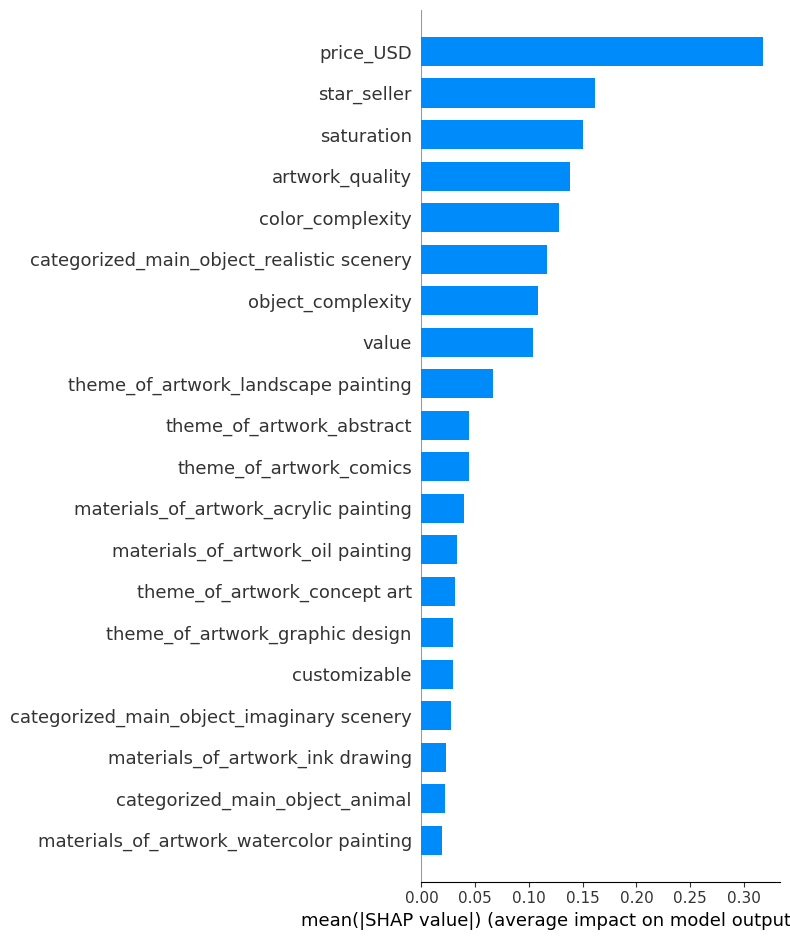

In [99]:
# SHAP summary plot
shap.summary_plot(shap_values, F1, feature_names=f1_features, plot_type="bar")

**아래 시각화 설명**

**SHAP Summary Plot**
- 요약 플롯은 각 특성(feature)의 중요도를 보여줌
- 각 점은 한 데이터 포인트의 SHAP 값을 나타내며, 색상은 해당 특성의 값이 높은지 낮은지를 나타냄
- 오른쪽으로 치우친 점들은 해당 특성이 예측값을 증가시키는 방향으로 작용함을 의미하고, 왼쪽으로 치우친 점들은 예측값을 감소시키는 방향으로 작용함을 의미함

**X 축: SHAP 값**
- SHAP 값은 각 특성이 예측에 미치는 영향을 나타냄
- 양의 SHAP 값은 해당 특성이 예측 값을 증가시키는 방향으로 작용함을 의미하고, 음의 SHAP 값은 예측 값을 감소시키는 방향으로 작용함을 의미

**Y 축: 특성**
- 각 특성의 이름이 나열되어 있으며 상위 특성들은 모델 예측에 더 큰 영향을 미치는 특성들임

**색상**
- 색상은 특성 값의 크기를 나타내며 빨간색은 높은 값, 파란색은 낮은 값을 의미

**해석 예시**
- 두번쨰로 큰 영향을 미치는 특성인 star_seller의 경우 star seller 일 때 (빨간점) 예측 값이 증가하는 경향이 있고 star seller가 아닐 때 예측 값을 감소시키는 경향이 있음

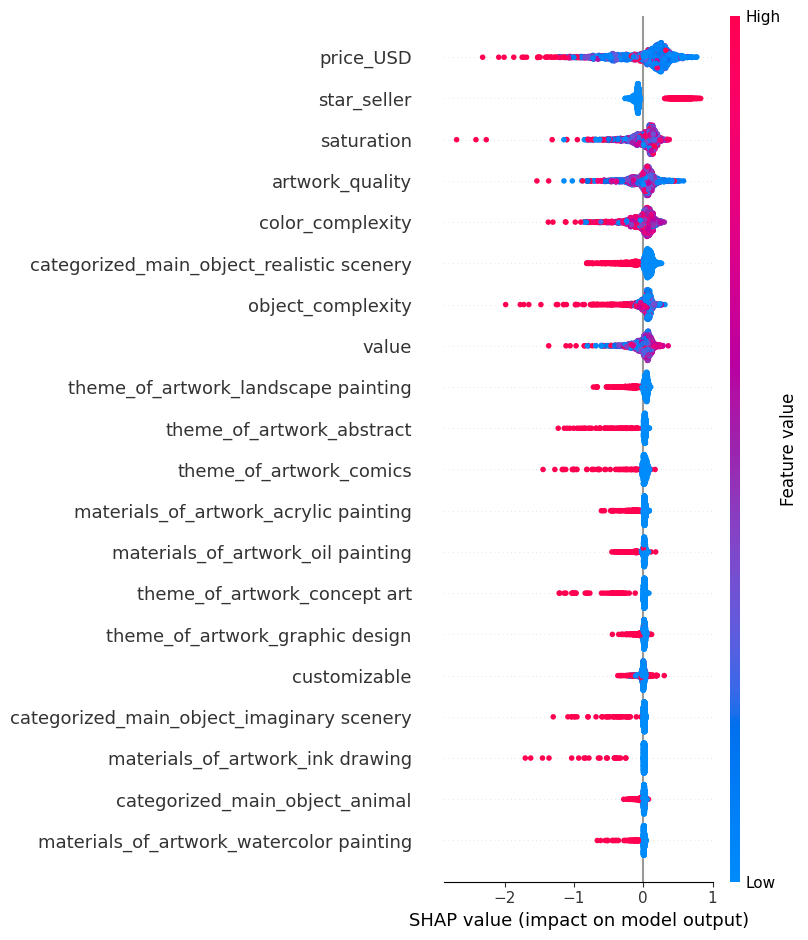

In [100]:
shap.summary_plot(shap_values, F1, feature_names=f1_features)

**아래 시각화 설명**

**SHAP Dependence Plot**
- SHAP Dependence Plot은 특정 특성이 모델 예측에 어떻게 영향을 미치는지, 그리고 다른 특성과의 상호작용을 통해 시각적으로 나타냄
- 이 시각화를 통해 모델의 예측이 특정 특성 값에 따라 어떻게 변하는지 쉽게 이해할 수 있음

**X축: star_seller**
- star_seller 특성의 값입니다. 이 값은 각 데이터 포인트의 작품 품질을 나타냅니다.

**Y축: SHAP value for star_seller**
- star_seller 특성의 SHAP 값
- 이 값은 star_seller 특성이 모델 예측에 미치는 영향을 나타냄
- SHAP 값이 양수이면 star_seller가 예측 값을 증가시키고, 음수이면 예측 값을 감소시킴

**색상: price_USD**
- 각 데이터 포인트의 색상은 price_USD 특성 값을 나타냄
- 색상 바는 price_USD 값의 범위를 보여주며 빨간색은 높은 price_USD 값을, 파란색은 낮은 price_USD 값을 의미

**사용법**
- 첫번쨰 인자(현재 star_seller)를 변경하여 확인하고자 하는 특성을 입력
- 기본적으로 입력한 인자와 가장 관련 있는 특성을 interaction_index(현재 price_USD)로 보여주나
확인하고자 하는 특성이 있으면 interaction_index에 입력하여 확인

**해석 예시**
- star_seller(x값)가 높으면 SHAP value(y값)가 증가하는 경향이 있음
- star_seller와 price_USD 간의 관계를 현재 시각화에서 한눈에 확인하기는 어려움

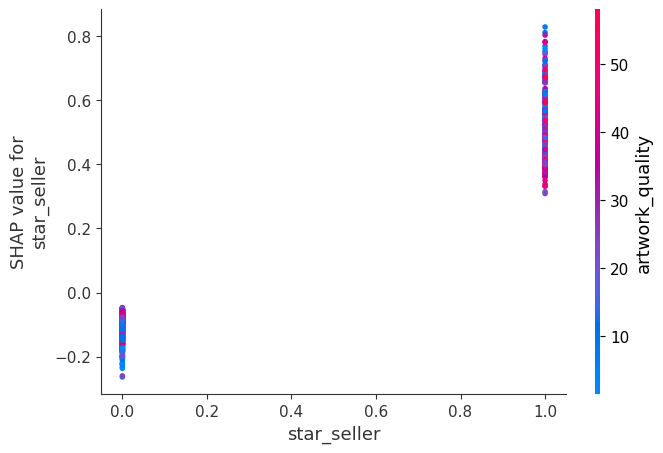

In [101]:
shap.dependence_plot(
    "star_seller",
    shap_values,
    F1,
    feature_names=f1_features,
    # interaction_index="saturation",
)

**아래 시각화 설명**

**SHAP Waterfall Plot**
- 개별 데이터 포인트에 대해 각 특성이 모델 예측에 미치는 영향을 시각적으로 나타냄

**X축: 특성 값**
- X축은 각 특성 값이 예측 값에 미치는 기여도를 나타냄
- 기여도가 양수이면 해당 특성이 예측 값을 증가시키고, 음수이면 예측 값을 감소시킴

**Y축: 특성 이름 및 값**
- Y축은 각 특성의 이름과 값
- 예를 들어, 2.386 = star_seller는 star_seller 특성의 값이 2.386임을 나타냄

**색상: 특성의 기여도**
- 색상은 특성의 기여도를 나타내며 빨간색은 예측 값을 증가시키는 특성을, 파란색은 예측 값을 감소시키는 특성을 의미

**사용법**
- i를 변경하여 원하는 개별 데이터 포인트의 index를 지정하고 결과 확인

**해석 예시**
- star_seller 특성이 2.386일 때 예측 값을 +0.42 증가시키는 데에 기여
- object_complexity 특성이 -0.299일 때 예측 값을 -0.12 감소시키는 데에 기여

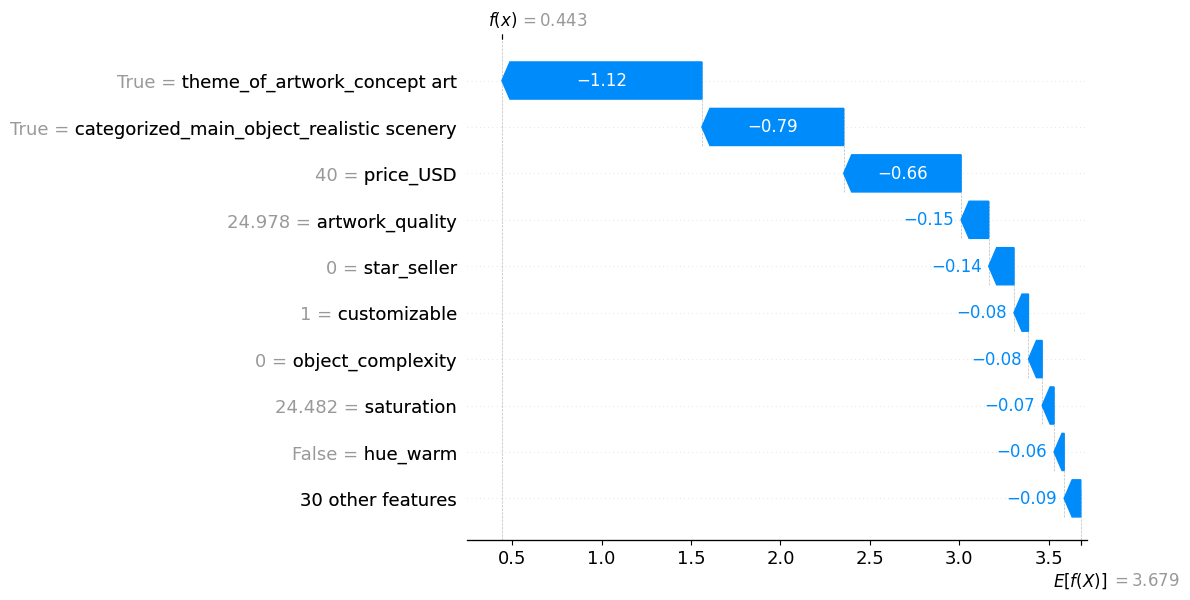

In [102]:
# SHAP Waterfall Plot
i = 19

explanation = shap.Explanation(
    values=shap_values[i],
    base_values=explainer.expected_value,
    data=F1.iloc[i],
    feature_names=f1_features,
)
shap.waterfall_plot(explanation)

**stars rating 별 data의 index와 예측값 확인**
- 예시: r=0 일 경우 별점이 0 이상 1 미만인 데이터 확인
- 각 배열은 index, 실제 별점, 예측 별점으로 이루어짐
- 활용법: r을 조절해가면서 각 범위별 실제 데이터의 인덱스를 확인할 수 있고 waterfall plot에 넣어 점수대별 영향을 확인할 수 있음

In [103]:
f1_pred = rf.predict(F1)

In [104]:
r = 0
condition = (DV1 >= r) & (DV1 < r + 1)
print(np.column_stack((np.where(condition)[0], DV1[condition], f1_pred[condition]))[:5])

[[11.        0.        1.2576  ]
 [13.        0.        1.521647]
 [14.        0.        0.987471]
 [19.        0.        0.442963]
 [25.        0.        0.935694]]


In [105]:
r = 5
condition = (DV1 >= r) & (DV1 < r + 1)
print(np.column_stack((np.where(condition)[0], DV1[condition], f1_pred[condition]))[:5])

[[ 1.        5.        4.594739]
 [ 7.        5.        4.093752]
 [ 9.        5.        4.698524]
 [10.        5.        4.73457 ]
 [16.        5.        4.189799]]


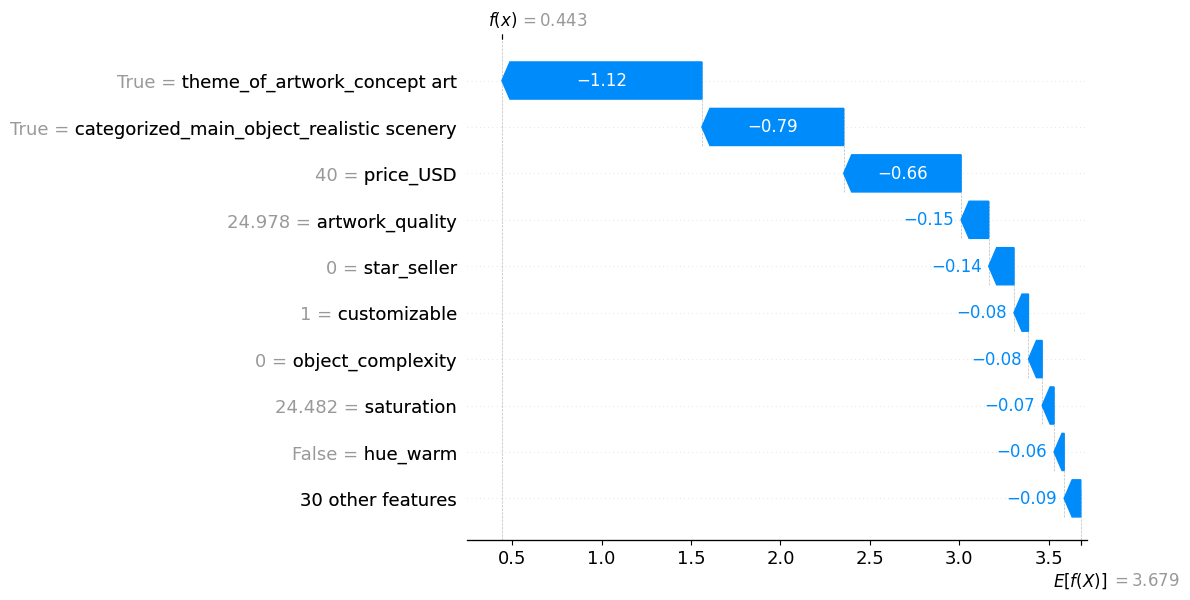

In [106]:
# SHAP Waterfall Plot
i = 19

explanation = shap.Explanation(
    values=shap_values[i],
    base_values=explainer.expected_value,
    data=F1.iloc[i],
    feature_names=f1_features,
)
shap.waterfall_plot(explanation)

### F2, DV1

In [109]:
# 모델 학습
rf_f2 = RandomForestRegressor(random_state=42, criterion="absolute_error")
rf_f2.fit(F2, DV1)

RandomForestRegressor(criterion='absolute_error', random_state=42)

In [110]:
explainer_f2 = shap.TreeExplainer(rf_f2, feature_names=f2_features)
shap_values_f2 = explainer_f2.shap_values(F2)

In [111]:
shap_values_f2_df = pd.DataFrame(shap_values_f2, columns=f2_features)

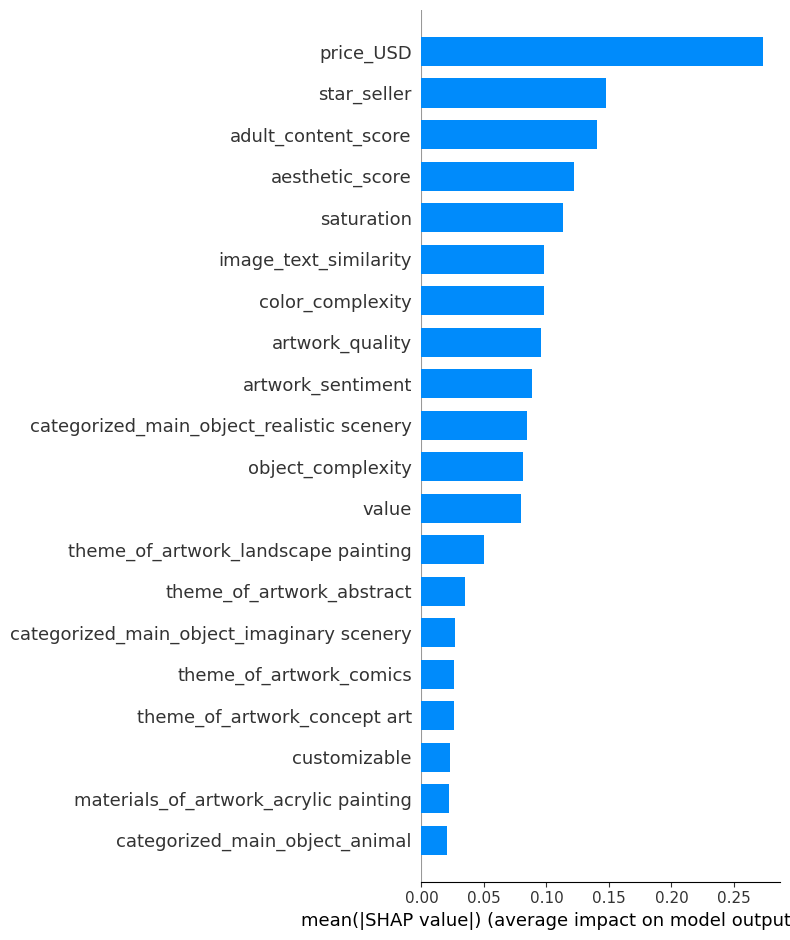

In [112]:
shap.summary_plot(shap_values_f2, F2, feature_names=f2_features, plot_type="bar")

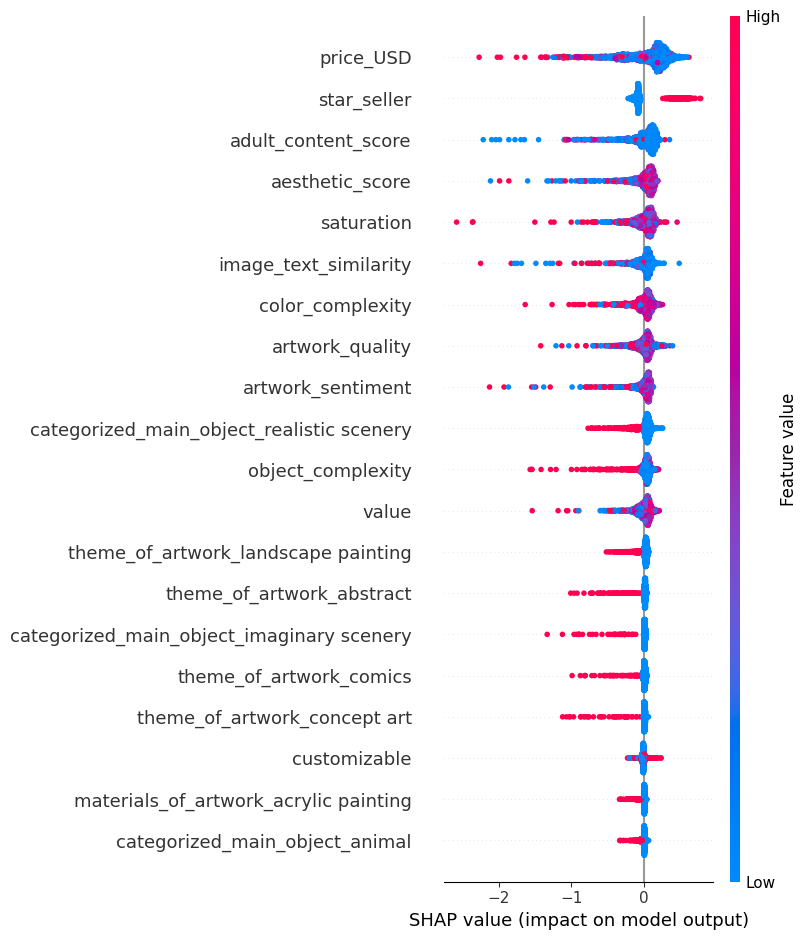

In [113]:
shap.summary_plot(shap_values_f2, F2, feature_names=f2_features)

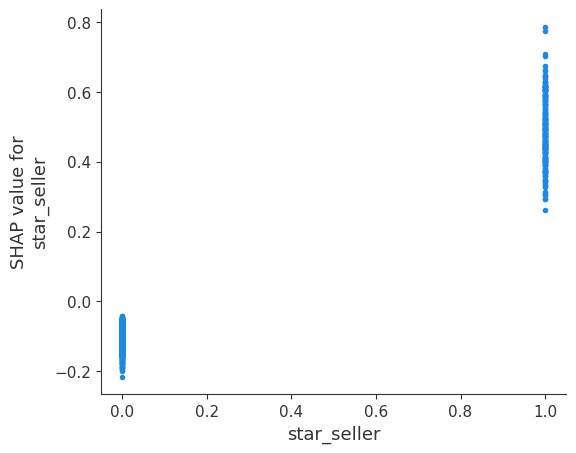

In [114]:
shap.dependence_plot(
    "star_seller",
    shap_values_f2,
    F2,
    feature_names=f2_features,
    interaction_index=None,
    # interaction_index="saturation",
)

In [115]:
f2_pred = rf_f2.predict(F2)

In [116]:
condition = F2["star_seller"] == 1
print(np.column_stack((np.where(condition)[0], DV1[condition], f2_pred[condition]))[:5])

[[0.       4.9482   4.684626]
 [1.       5.       4.688763]
 [2.       4.94     4.196262]
 [3.       4.94     3.796884]
 [4.       4.94     4.211128]]


In [117]:
r = 5
condition = (DV1 >= r) & (DV1 < r + 1)
print(
    np.column_stack((np.where(condition)[0], DV1[condition], f2_pred[condition]))[:20]
)

[[ 1.        5.        4.688763]
 [ 7.        5.        4.17784 ]
 [ 9.        5.        4.520697]
 [10.        5.        4.3852  ]
 [16.        5.        4.037391]
 [17.        5.        4.835751]
 [18.        5.        4.740031]
 [22.        5.        4.692755]
 [23.        5.        4.586728]
 [24.        5.        4.28485 ]
 [28.        5.        4.768634]
 [33.        5.        4.792145]
 [34.        5.        4.749181]
 [35.        5.        4.072543]
 [37.        5.        4.442006]
 [44.        5.        4.088972]
 [45.        5.        4.094746]
 [46.        5.        4.313139]
 [47.        5.        4.628975]
 [49.        5.        4.094914]]


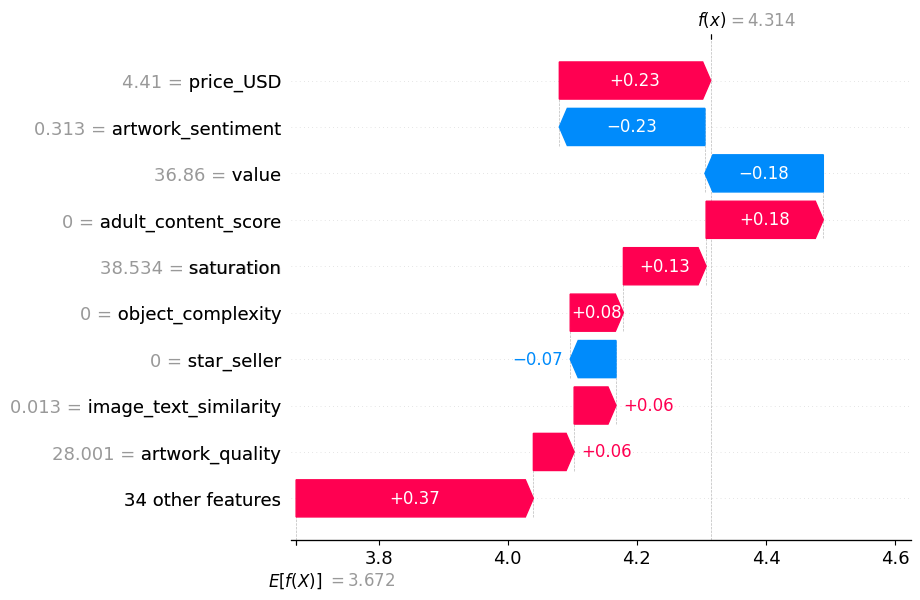

In [118]:
# SHAP Waterfall Plot
i = 915

explanation = shap.Explanation(
    values=shap_values_f2[i],
    base_values=explainer_f2.expected_value,
    data=F2.iloc[i],
    feature_names=f2_features,
)
shap.waterfall_plot(explanation)

In [119]:
print(F1.columns)

feature_dict = {k: i for i, k in enumerate(F1.columns)}

Index(['saturation', 'value', 'color_complexity', 'artwork_quality',
       'object_complexity', 'price_USD', 'star_seller', 'printable',
       'customizable', 'hue_cool', 'hue_warm',
       'categorized_main_object_animal', 'categorized_main_object_food',
       'categorized_main_object_human',
       'categorized_main_object_imaginary character',
       'categorized_main_object_imaginary scenery',
       'categorized_main_object_insect', 'categorized_main_object_none',
       'categorized_main_object_plant',
       'categorized_main_object_realistic scenery',
       'categorized_main_object_thing', 'categorized_main_object_기타',
       'theme_of_artwork_abstract', 'theme_of_artwork_comics',
       'theme_of_artwork_concept art', 'theme_of_artwork_graphic design',
       'theme_of_artwork_hyperrealism', 'theme_of_artwork_illustration',
       'theme_of_artwork_landscape painting',
       'theme_of_artwork_oriental painting',
       'theme_of_artwork_portrait painting',
       'materia

In [120]:
import pandas as pd
import altair as alt
from sklearn.inspection import partial_dependence
import numpy as np


def plot_pdp(model, X, feature_dict, feature_name, chart_width=500, chart_height=300):
    """
    주어진 모델과 데이터에 대해 특정 feature의 Partial Dependence Plot (PDP)을 그리고,
    데이터 분포를 tick으로 표시합니다.

    Parameters:
    - model: 학습된 sklearn 모델
    - X: 입력 데이터 (DataFrame)
    - feature_dict: feature 이름을 feature index로 매핑한 dict
    - feature_name: 시각화할 feature 이름 (feature_dict의 key로 존재해야 함)
    - chart_width: 차트 너비 (default 500)
    - chart_height: 차트 높이 (default 300)

    Returns:
    - altair Chart 객체
    """

    # --- PDP 계산 ---
    pdp_result = partial_dependence(model, X, features=feature_dict[feature_name])

    x_vals = pdp_result["grid_values"][0]
    y_vals = pdp_result["average"][0]

    df = pd.DataFrame({"feature_value": x_vals, "pdp_value": y_vals})
    tick_df = pd.DataFrame({"feature_value": X.iloc[:, feature_dict[feature_name]]})

    # --- x, y 범위 계산 ---
    x_min, x_max = x_vals.min(), x_vals.max()
    y_min, y_max = y_vals.min(), y_vals.max()
    y_range = y_max - y_min

    padding_factor = 0.1
    if np.isclose(y_range, 0):
        y_axis_min = y_min - 0.1
        y_axis_max = y_max + 0.1
    else:
        y_axis_min = y_min - padding_factor * y_range
        y_axis_max = y_max + padding_factor * y_range

    # --- Altair 차트 구성 ---
    line = (
        alt.Chart(df)
        .mark_line()
        .encode(
            x=alt.X(
                "feature_value:Q",
                title=feature_name,
                scale=alt.Scale(domain=[x_min, x_max], nice=True),
            ),
            y=alt.Y(
                "pdp_value:Q",
                title="Partial Dependence",
                scale=alt.Scale(zero=False, domain=[y_axis_min, y_axis_max]),
            ),
        )
    )

    ticks = (
        alt.Chart(tick_df)
        .transform_filter(
            f"datum.feature_value >= {x_min} && datum.feature_value <= {x_max}"
        )
        .mark_tick(
            opacity=0.25, color="black"
        )  # thickness 제거 (앞서 문제 있었던 부분)
        .encode(
            x=alt.X("feature_value:Q", scale=alt.Scale(domain=[x_min, x_max])),
            y=alt.value(chart_height),
        )
    )

    chart = (
        (line + ticks).properties(width=chart_width, height=chart_height).interactive()
    )

    return chart

In [121]:
chart = plot_pdp(rf, F1, feature_dict, feature_name="value")
chart

alt.LayerChart(...)